In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
mpl.rcParams['font.sans-serif']=['SimiHei']
mpl.rcParams['axes.unicode_minus']=False
raw_data = pd.read_csv(r"C:\Users\马朝阳\Desktop\常用数据\guanggao2482\ad_performance.csv",index_col=0)
raw_data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
0,A203,3.69,0.0071,0.0214,2.3071,419.77,0.0258,20,jpg,banner,roi,140*40,打折
1,A387,178.70,0.0040,0.0324,2.0489,157.94,0.0030,19,jpg,banner,cpc,140*40,满减
2,A388,91.77,0.0022,0.0530,1.8771,357.93,0.0026,4,jpg,banner,cpc,140*40,满减
3,A389,1.09,0.0074,0.3382,4.2426,364.07,0.0153,10,jpg,banner,cpc,140*40,满减
4,A390,3.37,0.0028,0.1740,2.1934,313.34,0.0007,30,jpg,banner,cpc,140*40,满减


In [2]:
raw_data.describe(include='all')

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
count,889,889.000000,889.000000,889.000000,889.000000,887.000000,889.000000,889.000000,889,889,889,889,889
unique,889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,5,4,8,6
top,A369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jpg,横幅,cpc,600*90,直降
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536,348,552,645,345
mean,NaN,540.846772,0.001408,0.030493,2.167166,262.669188,0.002852,16.052868,NaN,NaN,NaN,NaN,NaN
std,NaN,1634.410463,0.003291,0.106199,3.800528,224.364932,0.011608,8.509435,NaN,NaN,NaN,NaN,NaN
min,NaN,0.060000,0.000000,0.000000,1.000000,1.640000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,6.180000,0.000000,0.000600,1.392300,126.020000,0.000000,9.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,114.180000,0.000000,0.003200,1.793100,236.550000,0.000200,16.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,466.870000,0.001400,0.011800,2.216200,357.985000,0.002000,24.000000,NaN,NaN,NaN,NaN,NaN


In [3]:
raw_data2 = raw_data.drop(['平均停留时间'], axis=1)
cols = ["素材类型", "广告类型", "合作方式", "广告尺寸", "广告卖点"]
for x in cols:
    data = raw_data2[x].unique()
    print('变量[{0}]的取值有:\n{1}'.format(x, data))
    print('-.' * 20)
   

变量[素材类型]的取值有:
['jpg' 'swf' 'gif' 'sp']
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
变量[广告类型]的取值有:
['banner' 'tips' '不确定' '横幅' '暂停']
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
变量[合作方式]的取值有:
['roi' 'cpc' 'cpm' 'cpd']
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
变量[广告尺寸]的取值有:
['140*40' '308*388' '450*300' '600*90' '480*360' '960*126' '900*120'
 '390*270']
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.
变量[广告卖点]的取值有:
['打折' '满减' '满赠' '秒杀' '直降' '满返']
-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.-.


In [4]:

model_ohe=OneHotEncoder(sparse=False)
ohe_matrix=model_ohe.fit_transform(raw_data2[cols])


In [5]:
ohe_matrix

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [6]:
sacle_matrix = raw_data2.iloc[:, 1:7]
model_scaler = MinMaxScaler()
data_scaled = model_scaler.fit_transform(sacle_matrix).round(2)

In [7]:

sacle_matrix = raw_data2.iloc[:, 1:7]
model_scaler = MinMaxScaler()
data_scaled = model_scaler.fit_transform(sacle_matrix)

X = np.hstack((data_scaled, ohe_matrix))


In [8]:
score_list=[]
silhouette_int=-1
for n_clusters in range(2,8):
    model_kmeans=KMeans(n_clusters=n_clusters)
    labels_tmp=model_kmeans.fit_predict(X)
    silhouette_tmp=silhouette_score(X,labels_tmp)
    if silhouette_tmp>silhouette_int:
        best_k=n_clusters
        silhouette_int=silhouette_tmp
        best_kmeans=model_kmeans
        cluster_labels_k=labels_tmp
    score_list.append([n_clusters,silhouette_tmp])
print('{:*^60}'.format('k值对应的轮廓系数：'))
print(np.array(score_list))
print('最优的K值是:{}\n',best_k,silhouette_int)
    

*************************k值对应的轮廓系数：*************************
[[2.         0.38655493]
 [3.         0.45757883]
 [4.         0.50209812]
 [5.         0.4800359 ]
 [6.         0.47761127]
 [7.         0.50079838]]
最优的K值是:{}
 4 0.5020981194788054


In [9]:
cluster_labels=pd.DataFrame(cluster_labels_k,columns=['clusters'])
merge_data=pd.concat((raw_data2,cluster_labels),axis=1)


In [10]:
merge_data.head()

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点,clusters
0,A203,3.69,0.0071,0.0214,2.3071,0.0258,20,jpg,banner,roi,140*40,打折,2
1,A387,178.70,0.0040,0.0324,2.0489,0.0030,19,jpg,banner,cpc,140*40,满减,2
2,A388,91.77,0.0022,0.0530,1.8771,0.0026,4,jpg,banner,cpc,140*40,满减,2
3,A389,1.09,0.0074,0.3382,4.2426,0.0153,10,jpg,banner,cpc,140*40,满减,2
4,A390,3.37,0.0028,0.1740,2.1934,0.0007,30,jpg,banner,cpc,140*40,满减,2


In [11]:
clustering_count=pd.DataFrame(merge_data['渠道代号'].groupby(merge_data['clusters']).count()).T.rename({'渠道代号':'counts'})

In [12]:
clustering_ratio=(clustering_count/len(merge_data)).round(2).rename({'counts':'percentage'})

In [13]:
clustering_ratio

clusters,0,1,2,3
percentage,0.39,0.35,0.17,0.08


In [14]:
cluster_features=[]
for line in range(best_k):
    label_data=merge_data[merge_data['clusters']==line]
    part1_data=label_data.iloc[:,1:7]
    part1_desc=part1_data.describe().round(3)
    merge_data1=part1_desc.iloc[2,:]
    part2_data=label_data.iloc[:,7:-1]
    part2_desc=part2_data.describe(include='all')
    merge_data2=part2_desc.iloc[2,:]
    merge_line=pd.concat((merge_data1,merge_data2),axis=0)
    cluster_features.append(merge_line)
cluster_pd=pd.DataFrame(cluster_features).T
all_cluster_set=pd.concat((clustering_count,clustering_ratio,cluster_pd),axis=0)


In [15]:
all_cluster_set

,0,1,2,3
counts,349,313,154,73
percentage,0.39,0.35,0.17,0.08
日均UV,933.015,1390.01,2717.42,1904.37
平均注册率,0.003,0.003,0.005,0.003
平均搜索量,0.064,0.152,0.051,0.106
访问深度,5.916,1.168,0.947,0.943
订单转化率,0.006,0.017,0.007,0.009
投放总时间,8.77,8.199,8.529,8.217
素材类型,jpg,swf,jpg,swf
广告类型,横幅,不确定,banner,tips


In [16]:
cluster_pd

,0,1,2,3
日均UV,933.015,1390.01,2717.42,1904.37
平均注册率,0.003,0.003,0.005,0.003
平均搜索量,0.064,0.152,0.051,0.106
访问深度,5.916,1.168,0.947,0.943
订单转化率,0.006,0.017,0.007,0.009
投放总时间,8.77,8.199,8.529,8.217
素材类型,jpg,swf,jpg,swf
广告类型,横幅,不确定,banner,tips
合作方式,cpc,roi,cpc,cpm
广告尺寸,600*90,600*90,308*388,450*300


In [17]:
num_sets = cluster_pd.iloc[:6,:].T.astype(np.float64)
num_sets_max_min = model_scaler.fit_transform(num_sets)

No handles with labels found to put in legend.


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


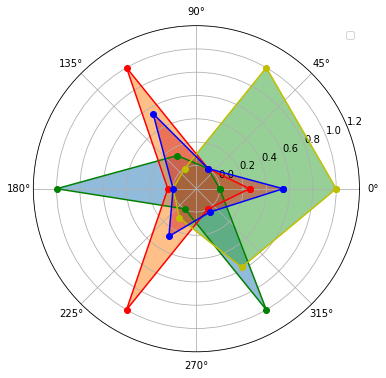

In [18]:

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
labels = np.array(merge_data1.index)
cor_list = ['g', 'r', 'y', 'b']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

for i in range(len(num_sets)):
    data_tmp = num_sets_max_min[i, :]
    data = np.concatenate((data_tmp, [data_tmp[0]]))
    ax.plot(angles, data, 'o-', c=cor_list[i])
    ax.fill(angles, data, alpha=2.5)
# ax.set_thetagrids(angles * 180 / np.pi, labels, fontproperties='SimHei')
# ax.set_title('各聚类类别显著特征对比', fontproperties='SimHei')
ax.set_rlim(-0.2, 1.2)
plt.legend()
